### Задание.

 - Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
 - Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
 - Разделите данные на выборку для обучения и тестирования
 - Постройте модель LDA
 - Визуализируйте предсказания для тестовой выборки и центры классов
 - Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
 - Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

#### Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

In [298]:
from sklearn.datasets import  load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [299]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

#### Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

In [300]:
iris = load_iris() 
data = pd.DataFrame(iris.data, columns=iris.feature_names)
variety = iris.target
data = data.drop('petal length (cm)', 1)
data = data.drop('petal width (cm)', 1)

#### Разделите данные на выборку для обучения и тестирования

In [301]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, variety, test_size=0.25)

#### Постройте модель LDA

In [302]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)


LinearDiscriminantAnalysis()

#### Визуализируйте предсказания для тестовой выборки и центры классов

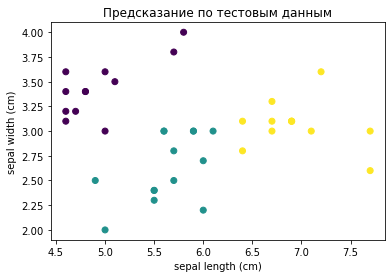

In [303]:
#Визуализируйте предсказания для тестовой выборки
fig, ax = plt.subplots()
ax.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=lda.predict(X_test))

#  Добавляем подписи к осям:
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
plt.title('Предсказание по тестовым данным')

plt.show()

<ipython-input-304-8ca5a67f62a4>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx, yy, Z, cmap='red_blue_classes',


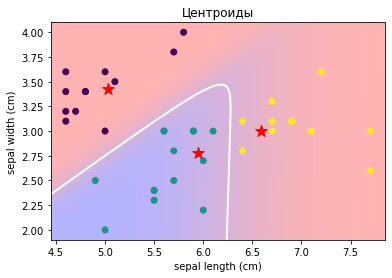

In [304]:
#центры классов
#Визуализируйте предсказания для тестовой выборки и центры классов

# сам scatter plot
fig, ax = plt.subplots()
ax.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=lda.predict(X_test))
# центроиды
ax.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
ax.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
ax.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
plt.title('Центроиды')

plt.show()

#### Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

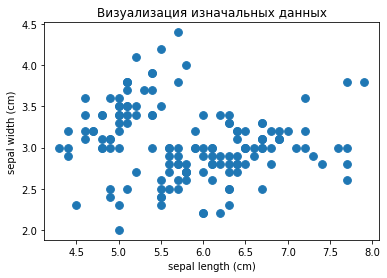

In [305]:
X = data.to_numpy()
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], s=60)
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
plt.title('Визуализация изначальных данных')
plt.show()

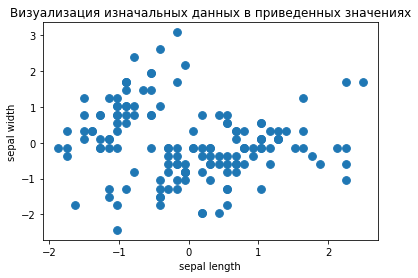

In [306]:
#приводим к единым значениям
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

fig, ax = plt.subplots()
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], s=60)
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
plt.title('Визуализация изначальных данных в приведенных значениях')
plt.show()

#### Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

##### график локтя

In [307]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

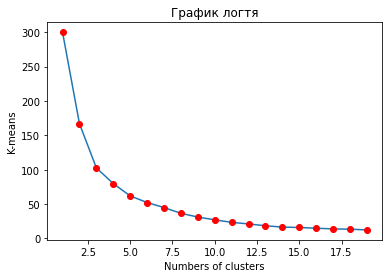

In [308]:
fig, ax = plt.subplots()
ax.plot(ks, k_inertia)
ax.plot(ks, k_inertia ,'ro')
ax.set_xlabel('Numbers of clusters')
ax.set_ylabel('K-means')
plt.title('График логтя')
plt.show()


оптимальное количество категорий 4 (основываясь на метод логтя)

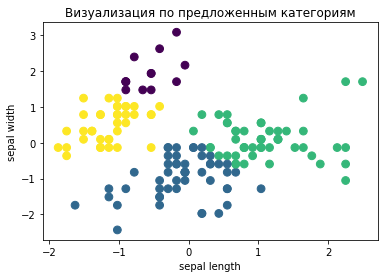

In [309]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(X_scaled)
fig, ax = plt.subplots()
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60)
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
plt.title('Визуализация по предложенным категориям')
plt.show()